In [2]:
import pandas as pd 
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### GroupBy技术用于数据分组运算，类似于Excel的分类汇总（对于不同分类进行运算），其运算的核心模式为split-apply-combine。

### 首先，数据集按照key（分组键）的方式分成小的数据片（split）；然后对每一个数据片进行操作，如分类求和（apply）最后将结果再组合起来形成新的数据集（combine）。

### 在第3章的小费数据集分析中，通过性别分别计算了小费平均值。当时的做法是：通过布尔索引选取男性和女性的小费数据，分别求平均，然后以此构造Series数据。这个方法其实很繁琐，如果类别很多，难道要一个个地选取出来计算吗？当然不是。

### 其实，利用groupby方法可以轻松地完成分组统计的任务。以小费数据集为例，通过性别分别计算小费平均值

In [4]:
grouped = tips['tip'].groupby(tips['sex'])
grouped

### 返回的grouped为GroupBy对象，是保存的中间数据，对该对象调用mean方法即可返回数据

In [5]:
grouped.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

### mean方法完成了分组数据的聚合运算，返回了一个Series数据，更多的聚合运算将在后面讲解。当然，也可以通过多个分组键进行计算，通过day和time，计算小费平均值

In [7]:
data_mean = tips['tip'].groupby([tips['day'],tips['time']]).mean()
data_mean

day   time  
Thur  Lunch     2.767705
      Dinner    3.000000
Fri   Lunch     2.382857
      Dinner    2.940000
Sat   Lunch          NaN
      Dinner    2.993103
Sun   Lunch          NaN
      Dinner    3.255132
Name: tip, dtype: float64

In [11]:
data_mean.dropna(inplace=True)

### 通过pandas绘图可分析出：晚餐（Dinner）比午餐（Lunch）的小费金额多，而且周六（Sat）、周日（Sun）的小费金额明显比周四（Thur）、周五（Fri）多

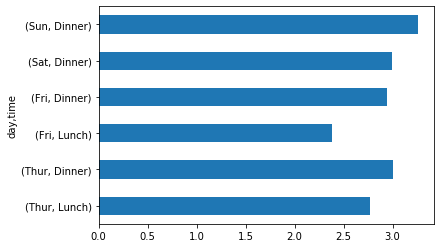

In [12]:
data_mean.plot(kind='barh')

### GroupBy对象是可迭代的，其构造为一组二元元组

In [17]:
for name,group in tips.groupby(tips['sex']):
    print(name)
    print(group)

Male
     total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns]
Female
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67  Female  

### 注意：GroupBy由分组名和数据片构成。

### size方法可返回各分组的大小

In [18]:
tips.groupby(tips['sex']).size()

sex
Male      157
Female     87
dtype: int64

## 6.1.2 按列名分组

### groupby方法使用的分组键为Series。当然，分组键也支持其他的格式，下面的内容中将一一介绍分组键格式和使用方法。DataFrame数据的列索引名称可以作为分组键。用列索引名称可以作为分组键时，用于分组的对象必须是DataFrame数据本身，否则搜索不到索引名称会报错。

In [19]:
smoker_mean = tips.groupby('smoker').mean()
smoker_mean

,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


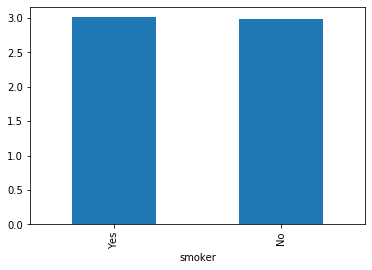

In [20]:
smoker_mean['tip'].plot(kind='bar')

### 上述方法返回的是多列DataFrame的数据，如果只需要获取tip（小费）列数据，通过索引选取即可。但GroupBy对象也可通过索引获取tip列，然后再进行聚合运算，它其实相当于语法糖，更好用

In [28]:
size_mean1 = tips['tip'].groupby(tips['size']).mean()
size_mean1

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

In [29]:
size_mean2 = tips.groupby('size')['tip'].mean() #语法糖
size_mean2

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

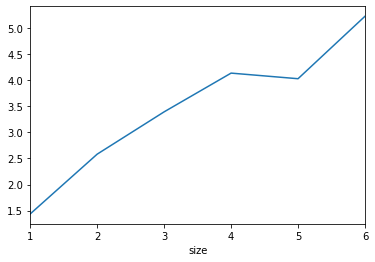

In [30]:
size_mean2.plot()

## 6.1.3 按列表或元组分组

### 分组键也可以是长度适当的列表或元组，长度适当其实就是要与待分组的DataFrame的行数一样，简单地理解，就是把列表或元组当做DataFrame的一列，然后按其分组

In [31]:
df = DataFrame(np.arange(16).reshape(4,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [32]:
list1= ['a','b','a','b']
df.groupby(list1).sum()

,0,1,2,3
a,8,10,12,14
b,16,18,20,22


## 6.1.4 按字典分组

### 如果原始的DataFrame中的分组信息很难确定或者不存在，可通过字典结构，定义分组的信息。通过各字母进行分组（不区分大小写），通过字典作为分组键

In [33]:
df =DataFrame(np.random.normal(size=(6,6)),index=['a','b','c','A','B','C'])
df

,0,1,2,3,4,5
a,-0.516268,1.212310,1.137927,-0.125447,0.977384,-1.111444
b,-1.064115,-0.982940,-1.213968,-0.248297,-0.912230,-1.161292
c,0.071658,0.140251,-0.903658,0.412921,-1.746246,-0.277193
A,0.067738,0.977971,0.609802,-0.835296,0.987402,0.963421
B,0.522861,0.139250,-0.203697,-0.228686,0.368365,1.199079
C,-0.274922,1.345551,0.046464,1.574346,-0.305492,-1.033499


In [34]:
dict1 = {
    'a':'one',
    'A':'one',
    'b':'two',
    'B':'two',
    'c':'three',
    'C':'three'
}

In [35]:
df.groupby(dict1).sum()

,0,1,2,3,4,5
one,-0.448530,2.190281,1.747730,-0.960743,1.964786,-0.148024
three,-0.203264,1.485802,-0.857194,1.987267,-2.051738,-1.310692
two,-0.541253,-0.843690,-1.417666,-0.476982,-0.543865,0.037787


## 6.1.5 按函数分组

### 函数作为分组键的原理类似于字典，通过映射关系进行分组，但是函数分组更加灵活

In [36]:
df =DataFrame(np.random.randn(4,4))
df

,0,1,2,3
0,1.453521,0.606629,-0.918996,-0.554144
1,0.739840,2.143894,-0.963973,-0.464346
2,-0.348676,-0.123696,-0.599444,1.102345
3,-1.359187,1.474231,-0.022312,-0.016480


In [37]:
def jug(x):
    if x>=0:
        return 'a'
    else:
        return 'b'

In [38]:
df[3].groupby(df[3].map(jug)).sum()

3
a    1.102345
b   -1.034971
Name: 3, dtype: float64

### 对于层次化索引，可通过级别进行分组，通过level参数，输入编号或名称即可

In [39]:
df =DataFrame(np.arange(16).reshape(4,4),
             index=[['one','one','two','two'],['a','b','a','b']],
             columns=[['apple','apple','orange','orange'],['red','green','red','green']])
df

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [40]:
df.groupby(level=1).sum()

apple       orange      
    red green    red green
a     8    10     12    14
b    16    18     20    22

### 当然，也可以在列上进行分组（axis=1）

In [41]:
df.groupby(level=1,axis=1).sum()

green  red
one a      4    2
    b     12   10
two a     20   18
    b     28   26